# Data analysis of the Open University Learning Analytics Dataset (OULAD)

Link to the dataset: https://analyse.kmi.open.ac.uk/open_dataset

The target is to present the fields of the dataset, better visualise and understand it.

In [1]:
import pandas as pd # import the used libraries within the collab
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# reading the data from the tables
courses = pd.read_csv('../OULAD_dataset/courses.csv')
assessments = pd.read_csv('../OULAD_dataset/assessments.csv')
studentAssessment = pd.read_csv('../OULAD_dataset/studentAssessment.csv')
studentInfo = pd.read_csv('../OULAD_dataset/studentInfo.csv')
studentRegistration = pd.read_csv('../OULAD_dataset/studentRegistration.csv')
studentVle = pd.read_csv('../OULAD_dataset/studentVle.csv')
vle = pd.read_csv('../OULAD_dataset/vle.csv')

## courses.csv

It has 3 fields, and those are described as:

* code_module – code name of the module, which serves as the identifier. A module is a type of a course. (values: AAA - GGG)
* code_presentation – code name of the presentation. It consists of the year and “B” for the presentation starting in February and “J” for the presentation starting in October. It is an identifier for a specific edition of a course.(values: 2013/2014 && J/B)
* length - length of the module-presentation in days. ( values either around 240 days or 265 days)

In [18]:
print(courses.shape)
courses

(22, 3)


,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


Text(0.5, 1.0, 'Number of Appearances of each Code Module')

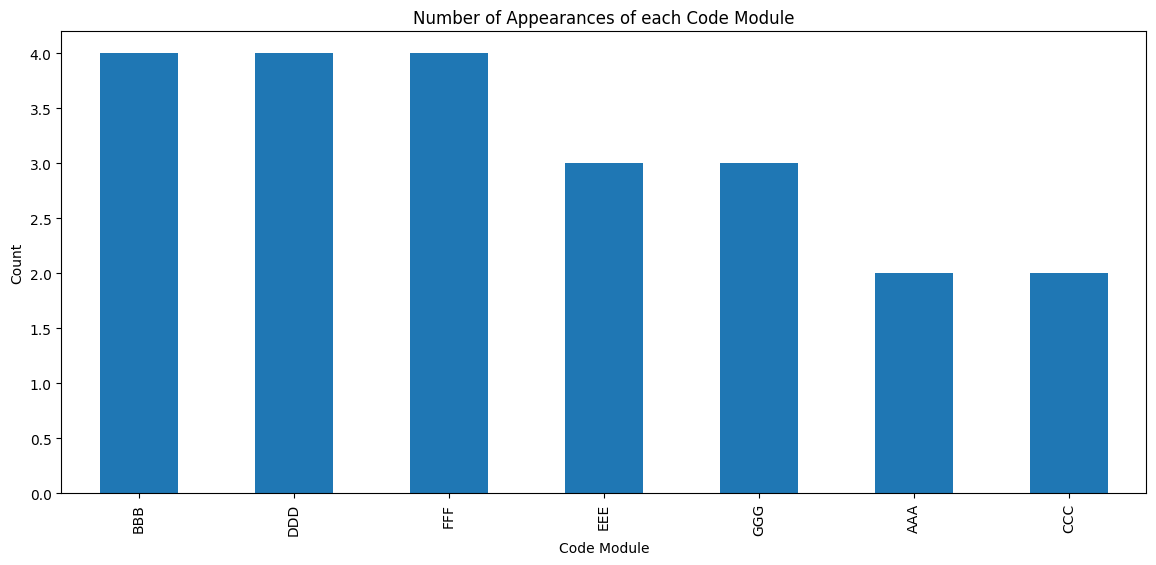

In [15]:
courses['code_module'].value_counts().plot(kind='bar', figsize=(14, 6))
plt.xlabel('Code Module')
plt.ylabel('Count')
plt.title('Number of Appearances of each Code Module')

Text(0.5, 1.0, 'Number of Appearances of the lengths of the courses')

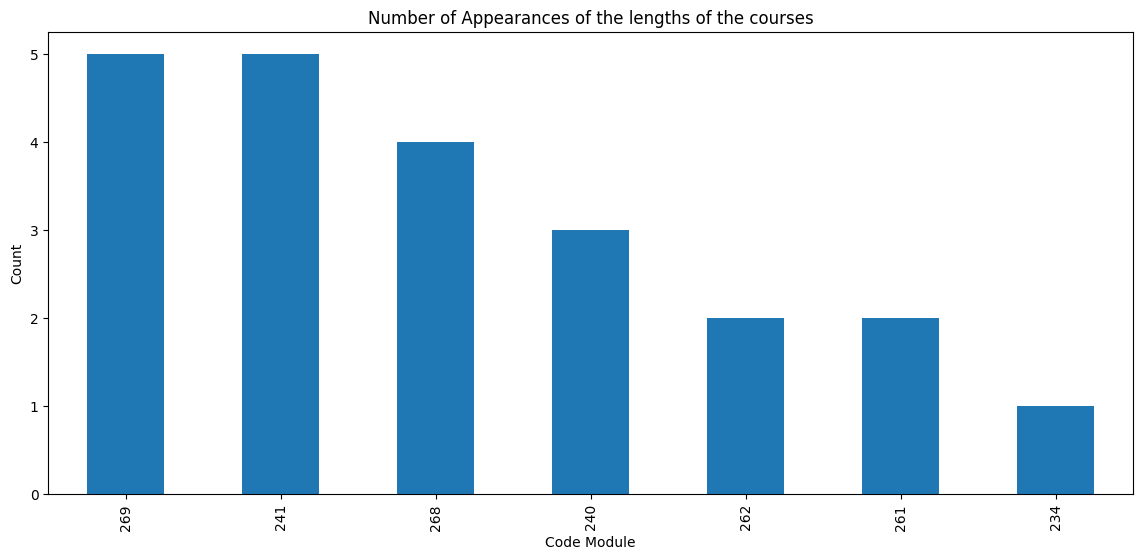

In [12]:
courses['module_presentation_length'].value_counts().plot(kind='bar', figsize=(14, 6))
plt.xlabel('Code Module')
plt.ylabel('Count')
plt.title('Number of Appearances of the lengths of the courses')

# assessments.csv

This file contains information about assessments in module-presentations. Usually, every presentation has a number of assessments followed by the final exam. CSV contains 6 columns:
* code_module – identification code of the module, to which the assessment belongs. (described before)
* code_presentation - identification code of the presentation, to which the assessment belongs. (described before)
* id_assessment – identification number of the assessment. (Integer)
* assessment_type – type of assessment. Three types of assessments exist: Tutor Marked Assessment (TMA), Computer Marked Assessment (CMA) and Final Exam (Exam).
* date – information about the final submission date of the assessment calculated as the number of days since the start of the module-presentation. The starting date of the presentation has number 0 (zero).(float)
* weight - weight of the assessment in %. Typically, Exams are treated separately and have the weight 100%; the sum of all other assessments is 100%.(float)

In [19]:
print(assessments.shape)
assessments.head(20)

(206, 6)


,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
5,AAA,2013J,1757,Exam,NaN,100.0
6,AAA,2014J,1758,TMA,19.0,10.0
7,AAA,2014J,1759,TMA,54.0,20.0
8,AAA,2014J,1760,TMA,117.0,20.0
9,AAA,2014J,1761,TMA,166.0,20.0


Text(0.5, 1.0, 'Presentation of the structure of each course')

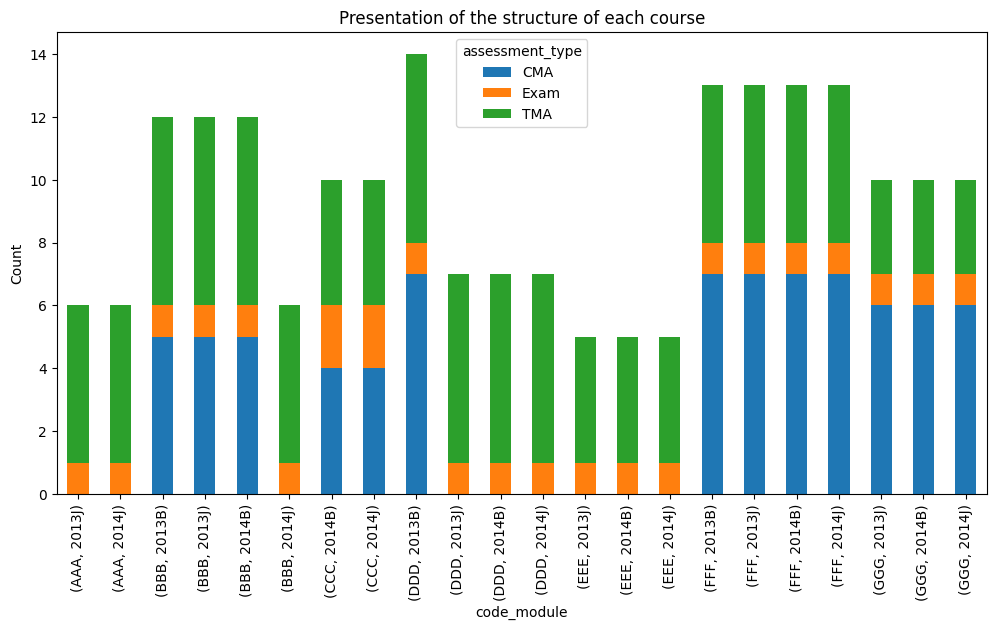

In [21]:
grouped = assessments.groupby(['code_module', 'code_presentation', 'assessment_type']).size().unstack().plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('code_module')
plt.ylabel('Count')
plt.title('Presentation of the structure of each course')

# vle.csv
The csv file contains information about the available materials in the VLE. Typically these are html pages, pdf files, etc. Students have access to these materials online and their interactions with the materials are recorded. The vle.csv file contains 6 columns and 6364 entries:
* id_site – an identification number of the material.(Integer)
* code_module – an identification code for module.(described above)
* code_presentation - the identification code of presentation.(described above)
* activity_type – the role associated with the module material.(string)
* week_from – the week from which the material is planned to be used.
* week_to – week until which the material is planned to be used.

In [22]:
print(vle.shape)
vle.head(20)

(6364, 6)


,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN
5,546614,AAA,2013J,homepage,NaN,NaN
6,546897,AAA,2013J,url,NaN,NaN
7,546678,AAA,2013J,oucontent,NaN,NaN
8,546933,AAA,2013J,resource,NaN,NaN
9,546708,AAA,2013J,oucontent,NaN,NaN


<Axes: xlabel='activity_type'>

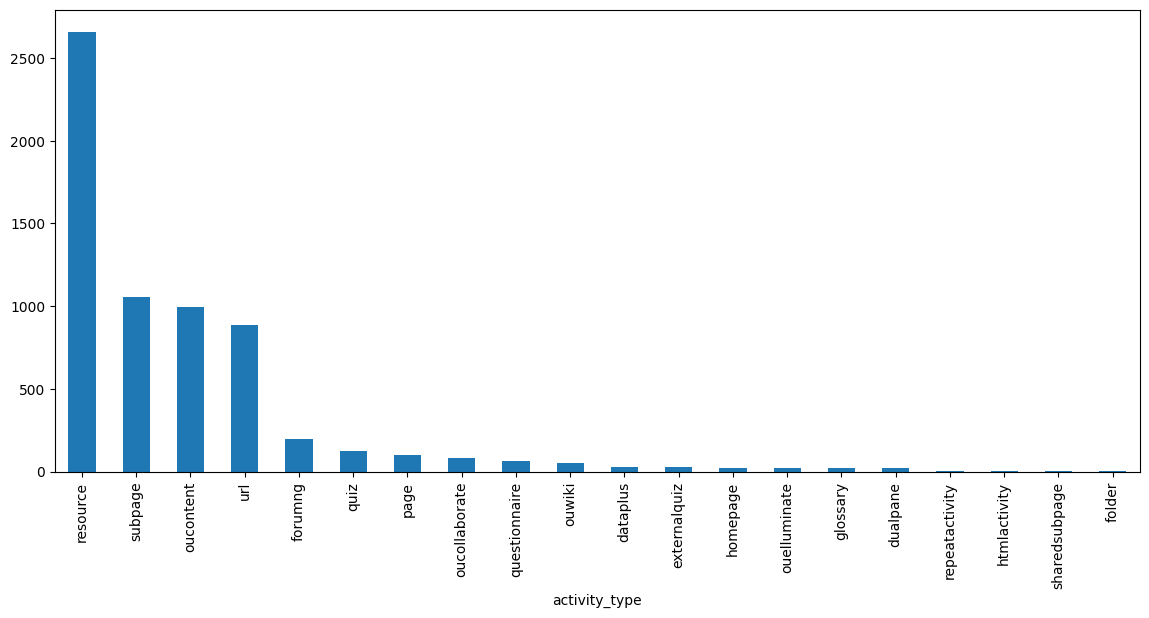

In [23]:
# bar flot for observing the number of total entries for each type of activity
vle['activity_type'].value_counts().plot(kind='bar', figsize=(14, 6))

Text(0.5, 1.0, 'Count of activity_type for each code_module and code_presentation')

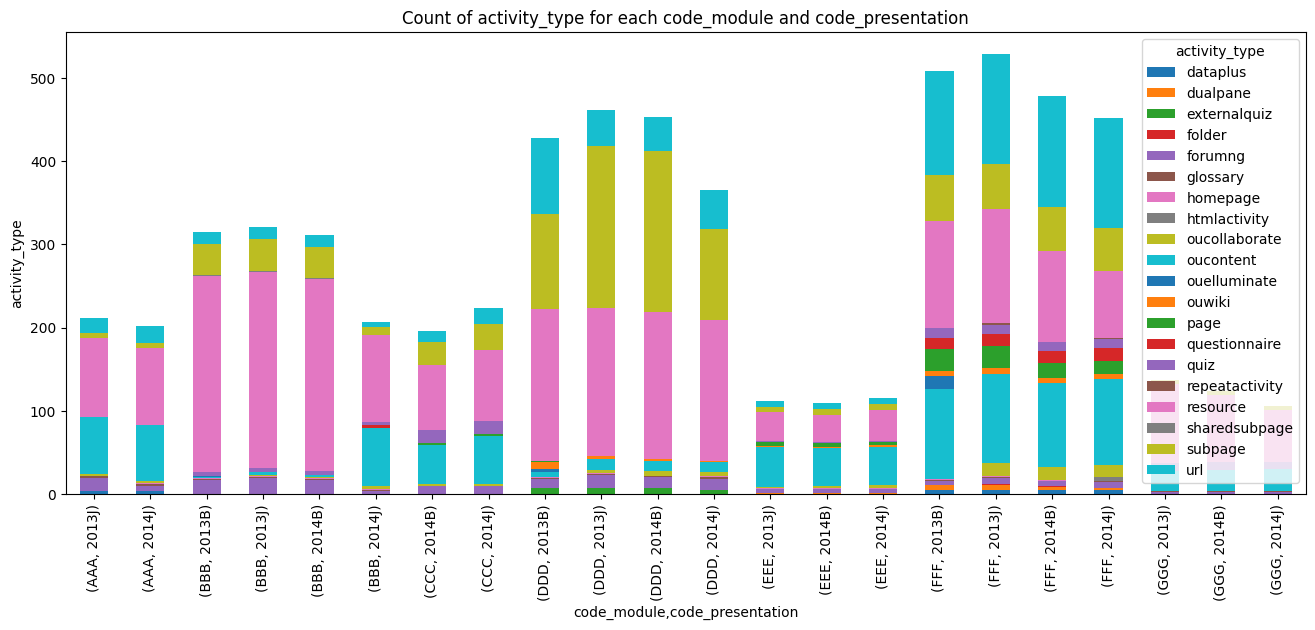

In [ ]:
# Counter for each activity_type for each code_module and code_presentation
grouped = vle.groupby(['code_module', 'code_presentation', 'activity_type']).size().unstack().plot(kind='bar', stacked=True, figsize=(16, 6))
plt.xlabel('code_module,code_presentation')
plt.ylabel('activity_type')
plt.title('Count of activity_type for each code_module and code_presentation')

5243

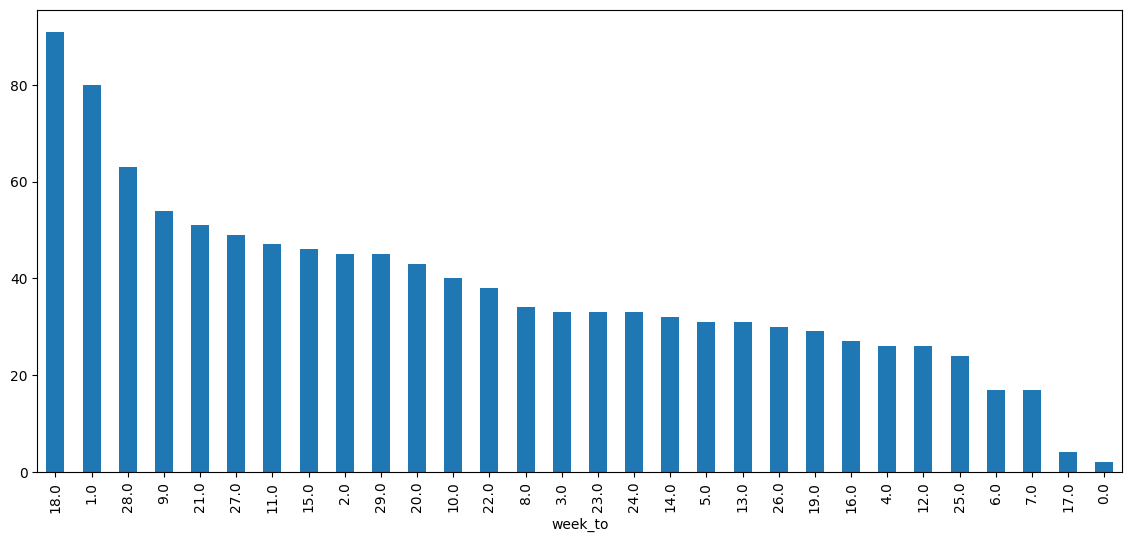

In [25]:
# count the week_to dates for the vle table
vle['week_to'].value_counts().plot(kind='bar', figsize=(14, 6)) # most of the entries within the table are NaN
vle['week_to'].isna().sum() # most of the entries within the table are NaN

# studentInfo.csv

This file contains demographic information about the students together with their results. File contains the following 12 columns and 32593 entries:
* code_module – an identification code for a module on which the student is registered.(described above)
* code_presentation - the identification code of the presentation during which the student is registered on the module.(described above)
* id_student – a unique identification number for the student.(Integer)
* gender – the student’s gender.(M or F)
* region – identifies the geographic region, where the student lived while taking the module-presentation.(String, 13 regions)
* highest_education – highest student education level on entry to the module presentation.(String, 5 types)
* imd_band – specifies the Index of Multiple Depravation band of the place where the student lived during the module-presentation.
* age_band – band of the student’s age.(String, 10 percentage intervals)
* num_of_prev_attempts – the number times the student has attempted this module.(Integer, 7 values between 0-6)
* studied_credits – the total number of credits for the modules the student is currently studying.(Integer, 30 categories)
* disability – indicates whether the student has declared a disability.(Binary)
* final_result – student’s final result in the module-presentation.(String, 4 categories)

In [6]:
# it can be seen there are less student Ids than the number of rows in the dataset. This shows there are
# student that took more than one course or the same course multiple times
print(studentInfo.shape)
print(studentInfo['id_student'].value_counts().size)


(32593, 12)
28785


In [7]:
studentInfo.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


<Axes: >

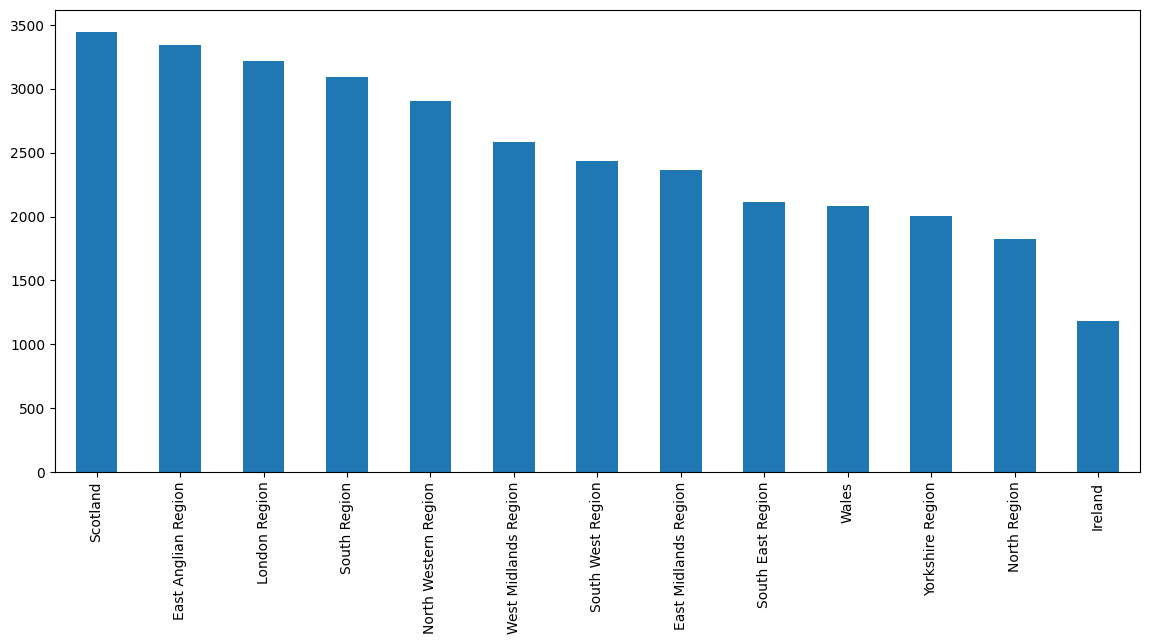

In [ ]:
studentInfo['region'].value_counts().plot(kind='bar', figsize=(14, 6))  # 13 regions within UK

<Axes: >

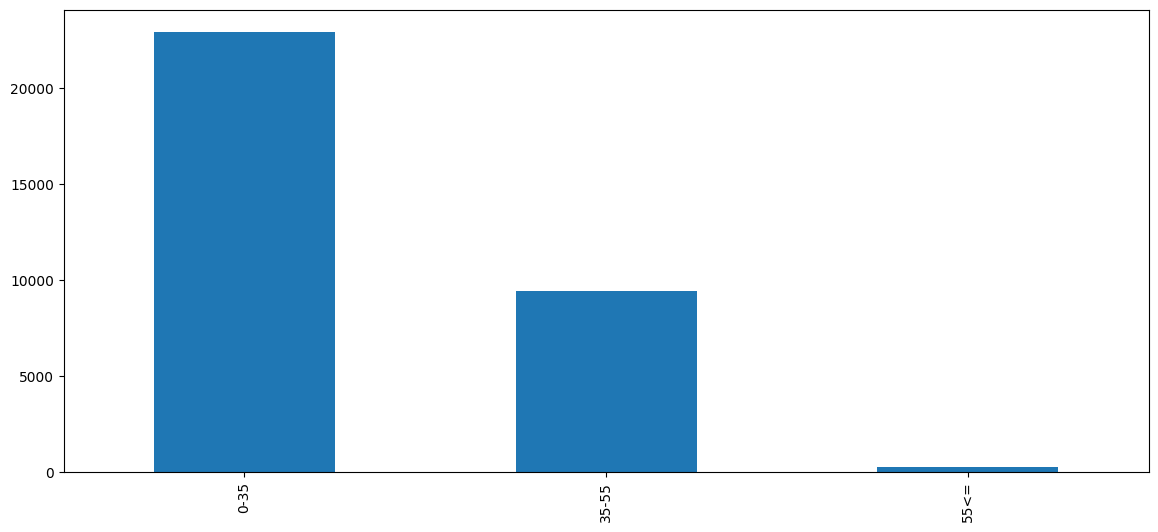

In [ ]:
# 3 age band categories, most of the entries being for 0-35
studentInfo['age_band'].value_counts().plot(kind='bar', figsize=(14, 6))  

<Axes: >

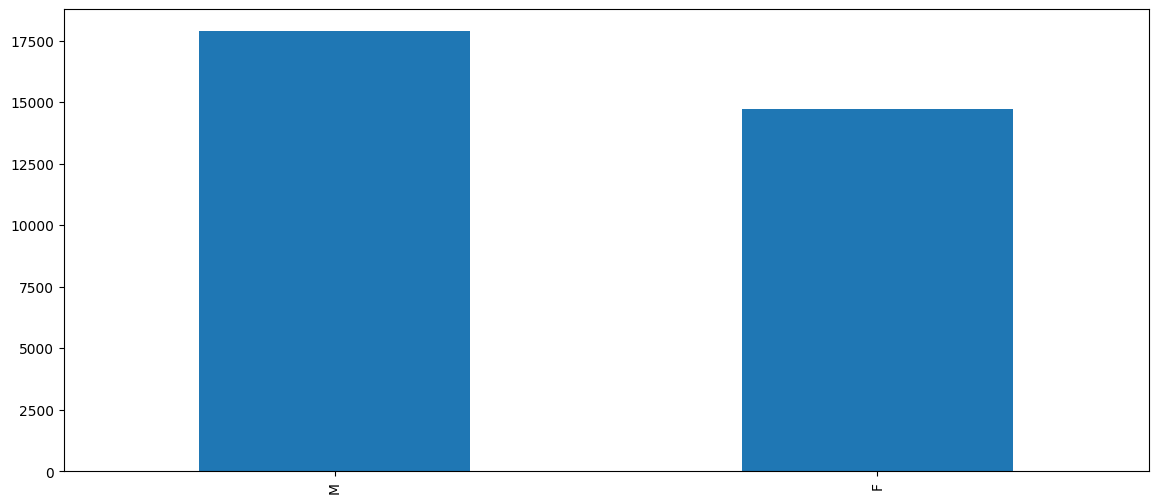

In [ ]:
studentInfo['gender'].value_counts().plot(kind='bar', figsize=(14, 6))  # 13 regions within UK

<Axes: xlabel='highest_education'>

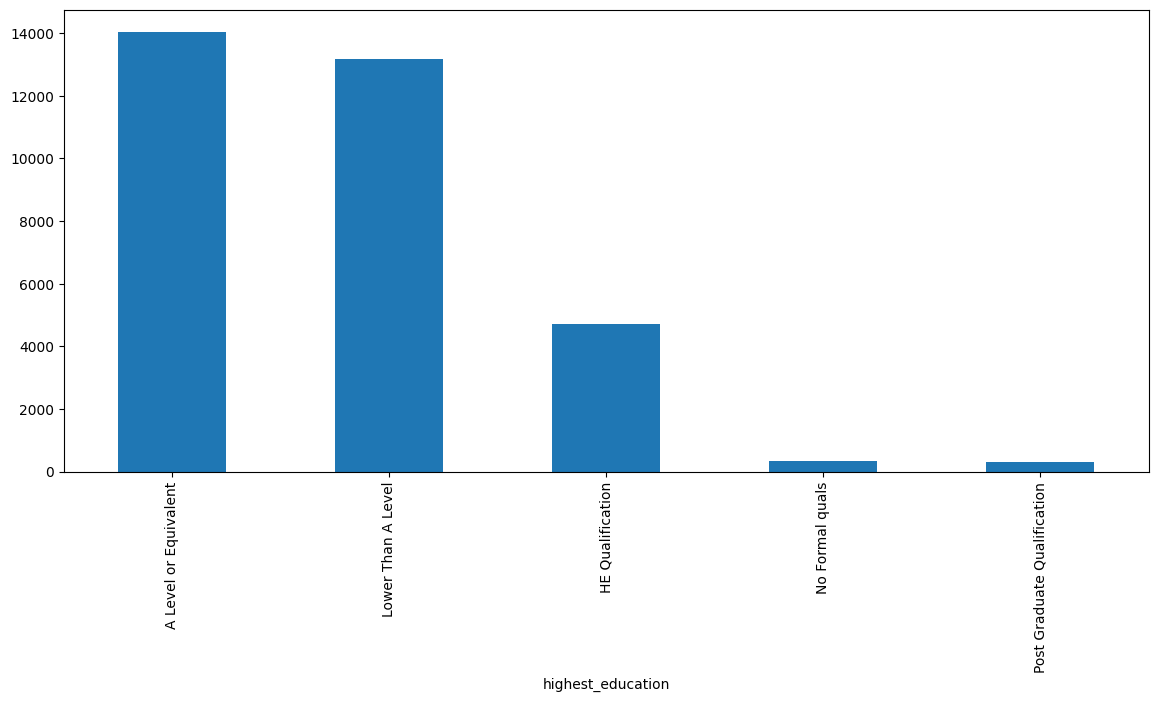

In [8]:
# 5 types of educations, having 2 categories that have the majority of entries
studentInfo['highest_education'].value_counts().plot(kind='bar', figsize=(14, 6)) 

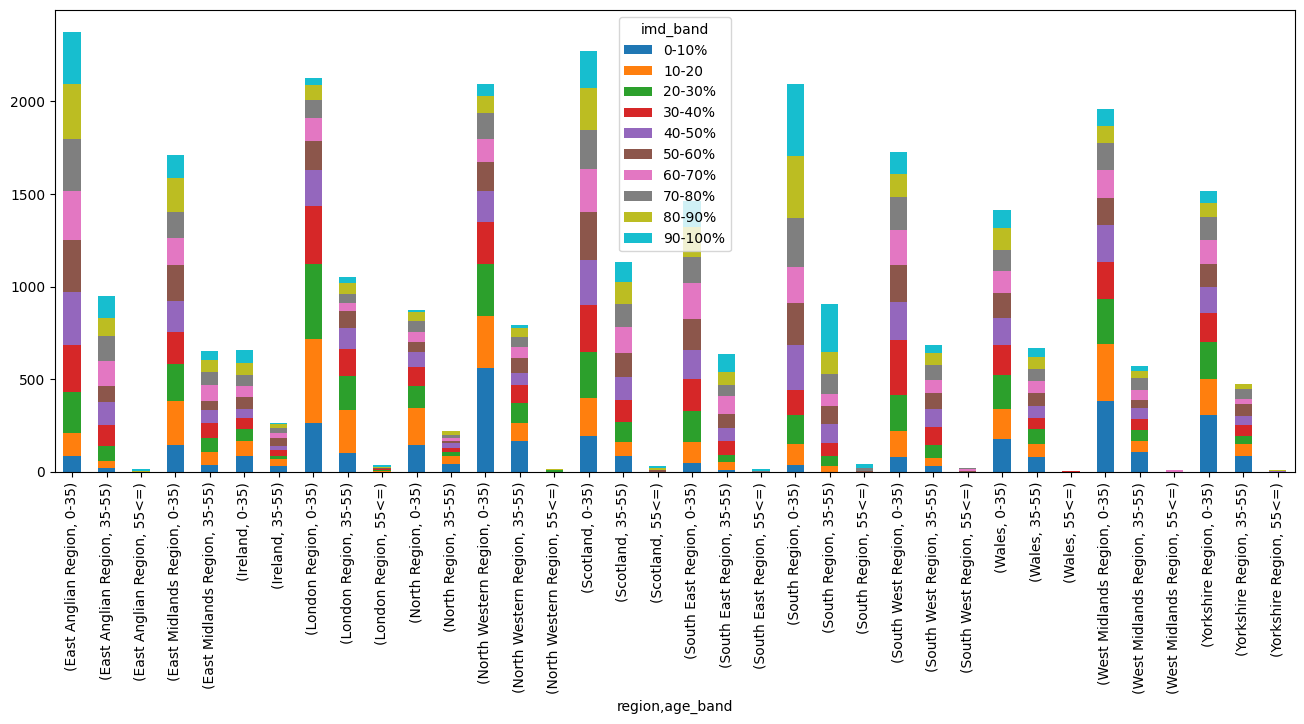

In [ ]:
# histogram for the cobmination of region, age_band and imd_band
studentInfo.groupby(['region','age_band', 'imd_band']).size().unstack().plot(kind='bar', stacked=True, figsize=(16, 6))

<Axes: >

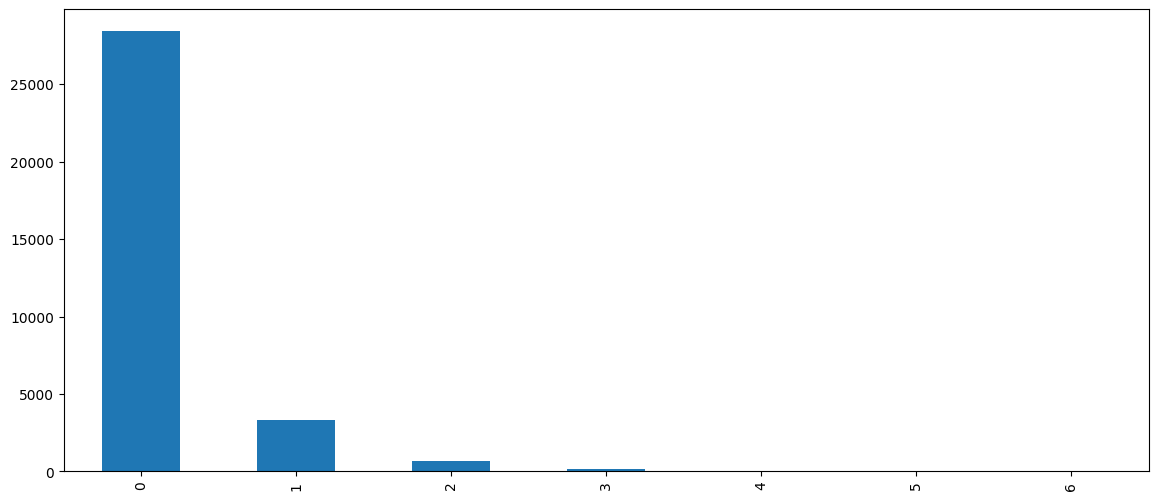

In [ ]:
# 7 types of values, most of the students have 0 previous attempts
studentInfo['num_of_prev_attempts'].value_counts().plot(kind='bar', figsize=(14, 6)) 

<Axes: >

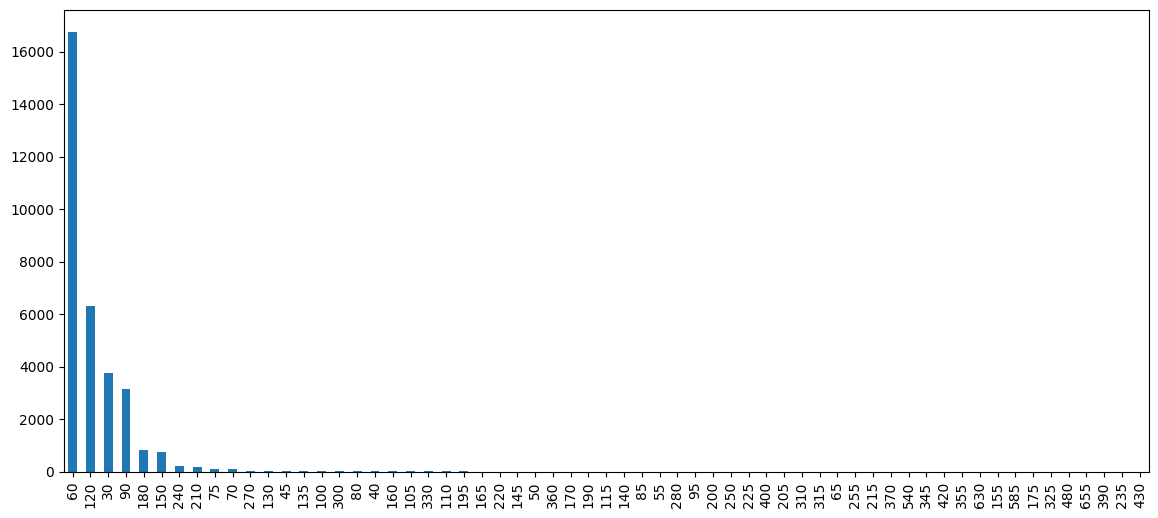

In [ ]:
# 30 categories, 4 categories being the majority
studentInfo['studied_credits'].value_counts().plot(kind='bar', figsize=(14, 6)) 

<Axes: >

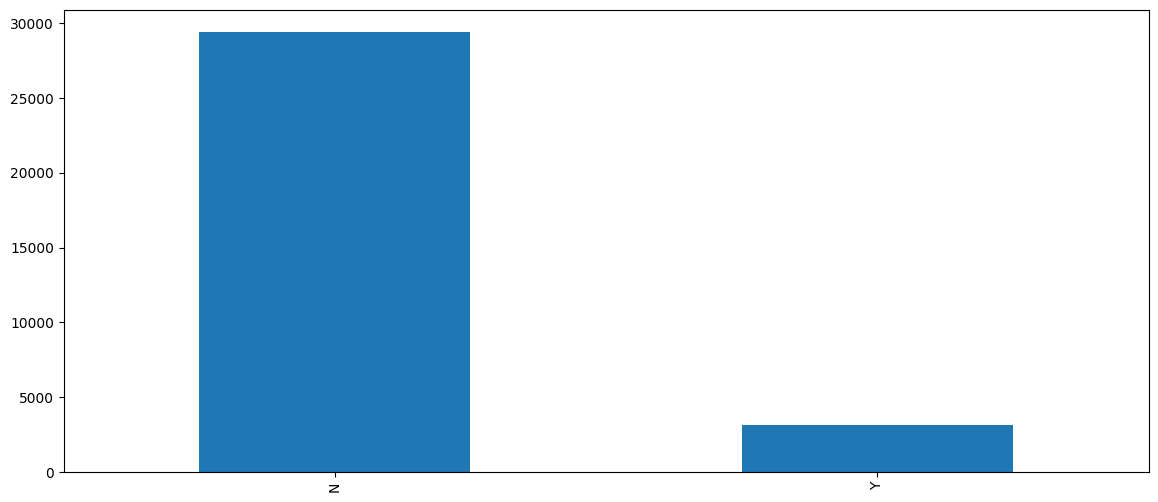

In [ ]:
# 2 categories, no disability having the majority
studentInfo['disability'].value_counts().plot(kind='bar', figsize=(14, 6)) 

<Axes: >

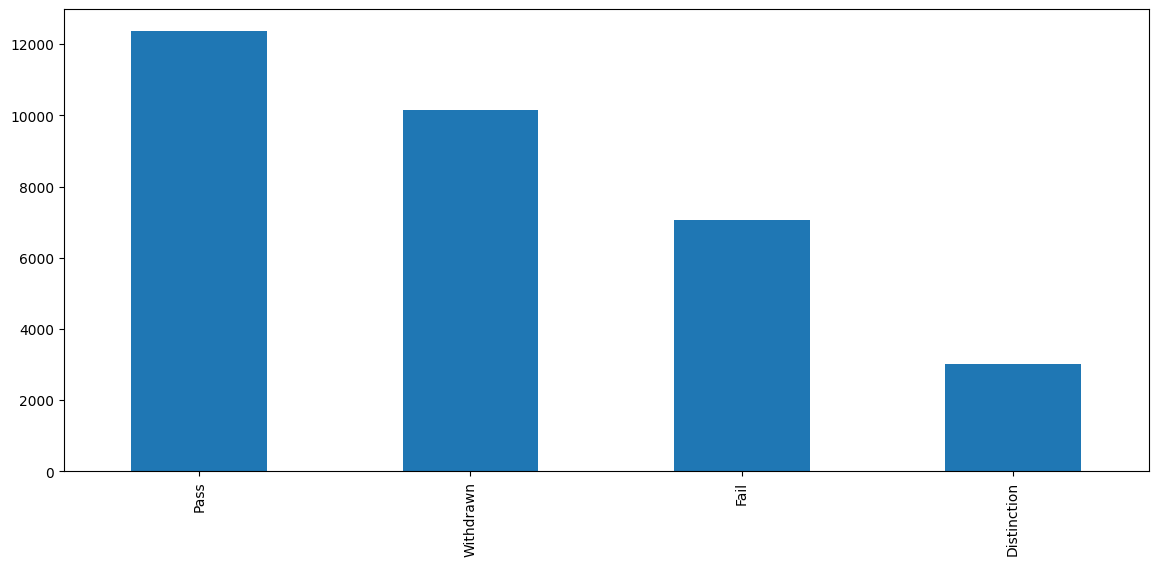

In [ ]:
# 4 categories, with an approximate arithmetic increase
studentInfo['final_result'].value_counts().plot(kind='bar', figsize=(14, 6)) 

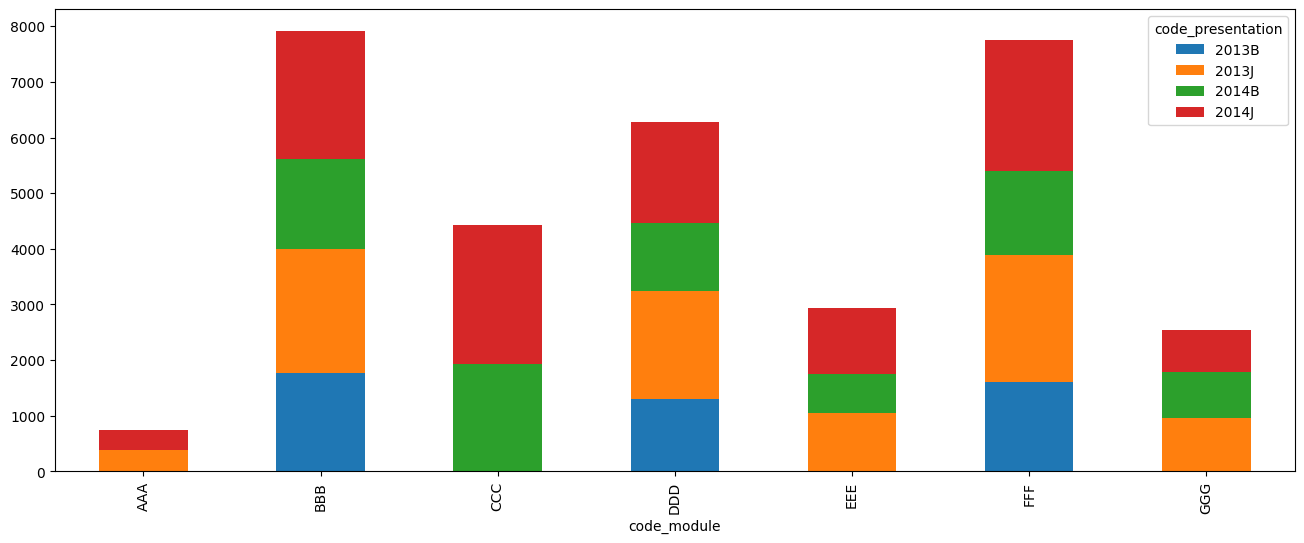

In [ ]:
# number of students in each course
studentInfo.groupby(['code_module','code_presentation']).size().unstack().plot(kind='bar', stacked=True, figsize=(16, 6)) 

In [9]:
counts = studentInfo['id_student'].value_counts()
max_count = counts.max()

# Filter the DataFrame for the entries with the maximum amount of appearances
matching_entries = studentInfo[studentInfo['id_student'].isin(counts[counts == max_count].index)]
matching_entries

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
9587,CCC,2014B,584077,M,North Western Region,A Level or Equivalent,20-30%,0-35,0,150,N,Withdrawn
11525,CCC,2014J,584077,M,North Western Region,A Level or Equivalent,20-30%,0-35,1,90,N,Withdrawn
15596,DDD,2013J,584077,M,North Western Region,A Level or Equivalent,20-30%,0-35,0,150,N,Withdrawn
16828,DDD,2014B,584077,M,North Western Region,A Level or Equivalent,20-30%,0-35,1,150,N,Withdrawn
18139,DDD,2014J,584077,M,North Western Region,A Level or Equivalent,20-30%,0-35,2,90,N,Withdrawn


# studentRegistration.csv

This file contains information about the time when the student registered for the module presentation. For students who unregistered the date of unregistration is also recorded. File contains 5 columns and 32593 entries:
* code_module – an identification code for a module.
* code_presentation - the identification code of the presentation.
* id_student – a unique identification number for the student.
* date_registration – the date of student’s registration on the module presentation, this is the number of days measured relative to the start of the module-presentation (e.g. the negative value -30 means that the student registered to module presentation 30 days before it started).(Float)
* date_unregistration – date of student unregistration from the module presentation, this is the number of days measured relative to the start of the module-presentation. Students, who completed the course have this field empty. Students who unregistered have Withdrawal as the value of the final_result column in the studentInfo.csv file.(Float)

In [10]:
print(studentRegistration.shape)
studentRegistration.head()

(32593, 5)


,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


# studentAssessment.csv
This file contains the results of students’ assessments. If the student does not submit the assessment, no result is recorded. The final exam submissions is missing, if the result of the assessments is not stored in the system. This file contains the 5 columns and 173912 entries:
* id_assessment – the identification number of the assessment.(Integer)
* id_student – a unique identification number for the student.(Integer)
* date_submitted – the date of student submission, measured as the number of days since the start of the module presentation.(Integer)
* is_banked – a status flag indicating that the assessment result has been transferred from a previous presentation.(Binary)
* score – the student’s score in this assessment. The range is from 0 to 100. The score lower than 40 is interpreted as Fail. The marks are in the range from 0 to 100.

In [11]:
print(studentAssessment.shape)
studentAssessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [12]:
studentAssessment[np.isnan(studentAssessment['score'])] # 173 missing scores

,id_assessment,id_student,date_submitted,is_banked,score
215,1752,721259,22,0,NaN
937,1754,260355,127,0,NaN
2364,1760,2606802,180,0,NaN
3358,14984,186780,77,0,NaN
3914,14984,531205,26,0,NaN
...,...,...,...,...,...
148929,34903,582670,241,0,NaN
159251,37415,610738,87,0,NaN
166390,37427,631786,221,0,NaN
169725,37435,648110,62,0,NaN


<Axes: >

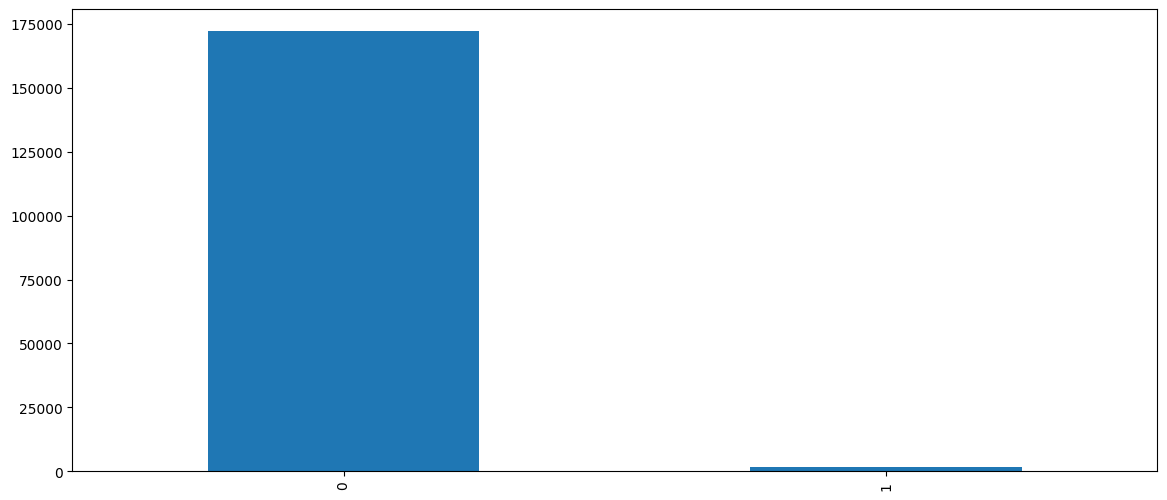

In [ ]:
studentAssessment['is_banked'].value_counts().plot(kind='bar', figsize=(14, 6)) # binary, with a majority for not banked

<Axes: >

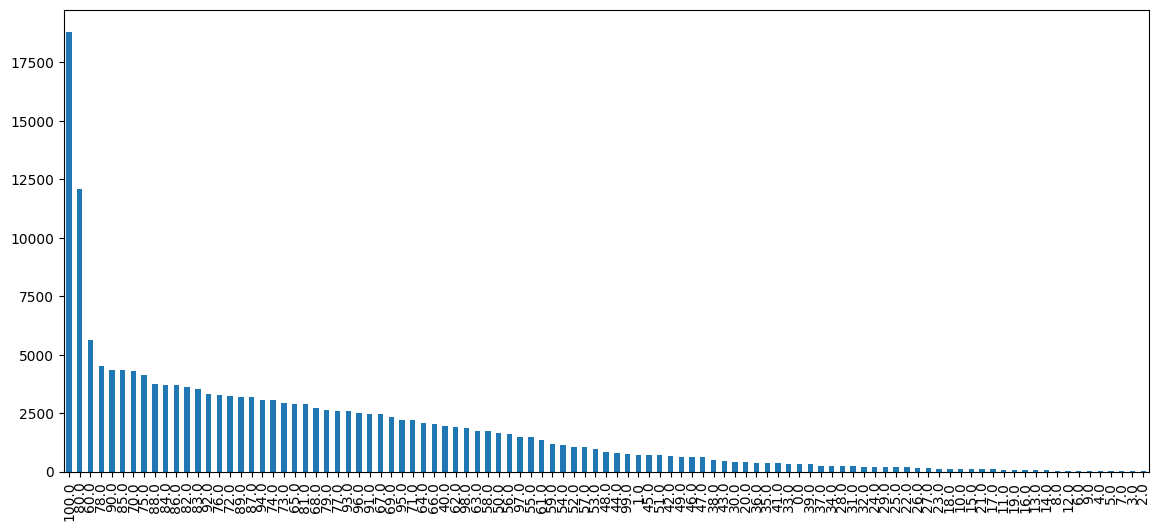

In [ ]:
studentAssessment['score'].value_counts().plot(kind='bar', figsize=(14, 6)) # grades distribution

# studentVle.csv
The studentVle.csv file contains information about each student’s interactions with the materials in the VLE. This file contains 6 columns and 10655280 entries:
* code_module – an identification code for a module.
code_presentation - the identification code of the module presentation.
* id_student – a unique identification number for the student.
* id_site - an identification number for the VLE material.
* date – the date of student’s interaction with the material measured as the number of days since the start of the module-presentation.
* sum_click – the number of times a student interacts with the material in that day.

In [14]:
print(studentVle.shape)
studentVle.head(30)

(10655280, 6)


,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1
5,AAA,2013J,28400,546652,-10,8
6,AAA,2013J,28400,546876,-10,2
7,AAA,2013J,28400,546688,-10,15
8,AAA,2013J,28400,546662,-10,17
9,AAA,2013J,28400,546890,-10,1


<Axes: xlabel='sum_click'>

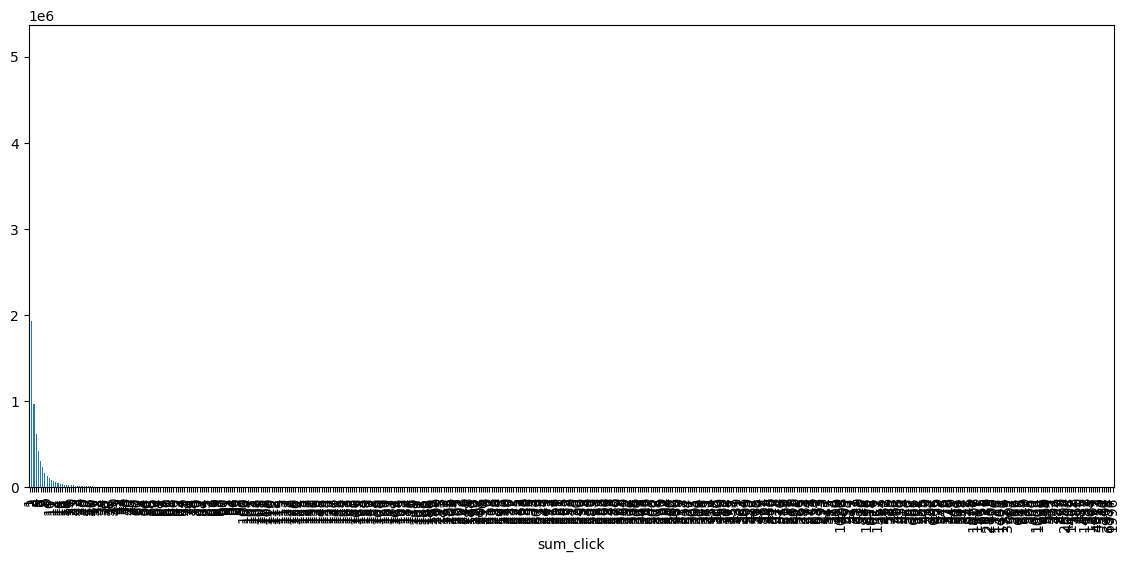

In [15]:
studentVle['sum_click'].value_counts().plot(kind='bar', figsize=(14, 6)) # there is a large number of possibilities for the sum_click